/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Verificando dados para 2023-10-01...
Dados para 2023-10-01:
redes sociais e saúde mental     0
ansiedade                       77
depressão                       28
Name: 2023-10-01 00:00:00, dtype: int64



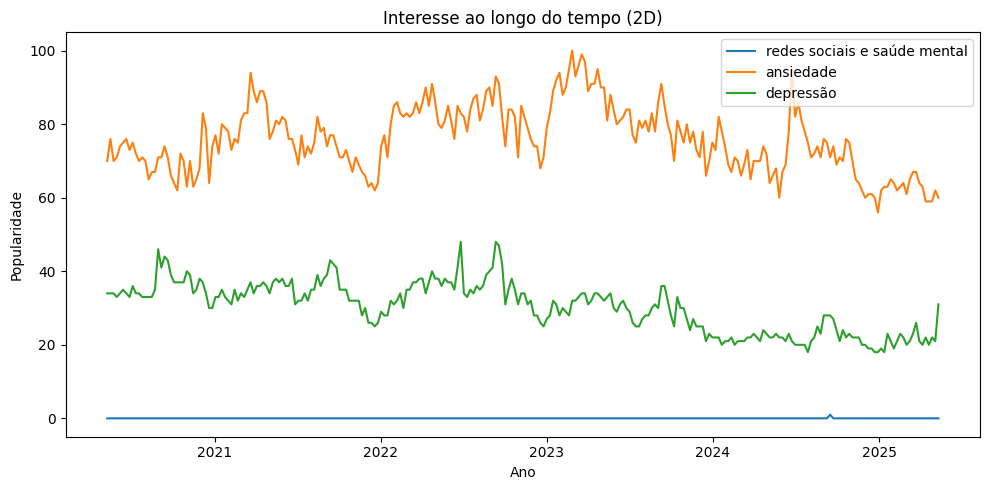

<ipython-input-21-7355a26b410a>:94: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


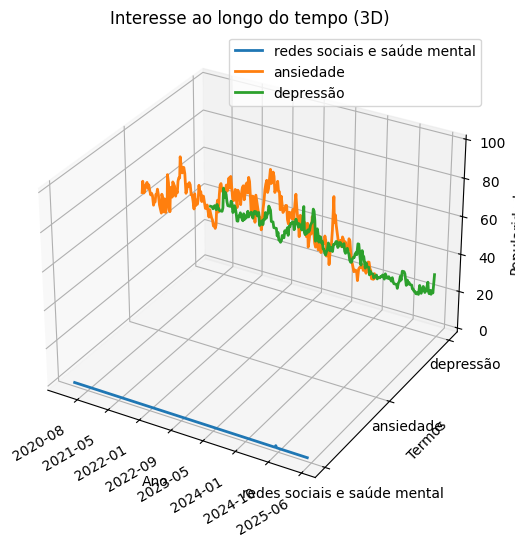

In [ ]:
# Script para buscar dados do Google Trends, gerar gráficos 2D e 3D,
# e identificar dados para uma data específica usando Python
# Grupo : Guilherme Paz, Katryni Haaby, Luana Harmatiuk, Bianca Lima, Vanessa Costa, Eduardo Lima
# obs: cuidado ao colocar para rodar o código, o pytrends possui problemas de latência dependendo do horário

!pip install pytrends  # Instalar biblioteca pytrends

from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Ferramenta para gráficos 3D
import time
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

# Inicializar o pytrends
pytrends = TrendReq(hl='pt-BR', tz=0)

# Definir os termos de busca
termos = ('redes sociais e saúde mental', 'ansiedade', 'depressão')

# Pausa para evitar bloqueios por excesso de requisições
time.sleep(5)

# Construir a requisição com os parâmetros
pytrends.build_payload(termos, timeframe='today 5-y', geo='BR')

# Obter dados de interesse ao longo do tempo
data = pytrends.interest_over_time()

# Remover a coluna 'isPartial' se existir
if 'isPartial' in data.columns:
    data = data.drop(columns=['isPartial'])

# === Identificar uma data específica ===
# Definir uma data específica para verificar
data_especifica = datetime(2023, 10, 1)

print(f"Verificando dados para {data_especifica.date()}...")

# O índice do DataFrame está em datetime64; verificar se data_especifica está presente
# Normalizamos as datas para comparar apenas a parte da data (sem horas)
datas_normalizadas = data.index.normalize()

if data_especifica in datas_normalizadas:
    # Encontrar a linha correspondente à data
    linha = data.iloc[datas_normalizadas.get_loc(data_especifica)]
    print(f"Dados para {data_especifica.date()}:\n{linha}\n")
else:
    print(f"Não há dados disponíveis para {data_especifica.date()}\n")

# === Gráfico 2D ===
plt.figure(figsize=(10, 5))
for termo in termos:
    if termo in data.columns:
        plt.plot(data.index, data[termo], label=termo)
plt.title('Interesse ao longo do tempo (2D)')
plt.xlabel('Ano')
plt.ylabel('Popularidade')
plt.legend()
plt.tight_layout()
plt.show()

# === Gráfico 3D ===
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Codificar termos como valores numéricos para o eixo Y
indices_termos = {termo: idx for idx, termo in enumerate(termos)}

# Converter índice de datas para formato numérico (datas do matplotlib)
x_vals = mdates.date2num(data.index.to_pydatetime())

for termo in termos:
    if termo in data.columns:
        y_vals = np.full_like(x_vals, indices_termos[termo], dtype=float)
        z_vals = data[termo].values
        ax.plot(x_vals, y_vals, z_vals, label=termo, linewidth=2)

# Definir rótulos dos eixos
ax.set_xlabel('Ano')
ax.set_ylabel('Termos')
ax.set_zlabel('Popularidade')

# Definir os ticks do eixo Y como os nomes dos termos
ax.set_yticks(list(indices_termos.values()))
ax.set_yticklabels(list(indices_termos.keys()))

# Formatar eixo X como datas
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
fig.autofmt_xdate()

ax.set_title('Interesse ao longo do tempo (3D)')
ax.legend()
plt.tight_layout()
plt.show()
